In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.tree import DecisionTreeRegressor

# Task 1: Problem 1 - Rejection Sampling and Monte Carlo Integration

def problem1_inversion(n_samples=1):
    """
    Samples from the given distribution using rejection sampling.
    """
    samples = []
    while len(samples) < n_samples:
        x = np.random.uniform(0, 1)  # Sample from the uniform distribution
        y = np.random.uniform(0, np.exp(0.5 - 1))  # Upper bound of target distribution
        if y <= np.exp(x**2 - 1):
            samples.append(x)
    return np.array(samples)

# Generate samples
problem1_samples = problem1_inversion(100000)

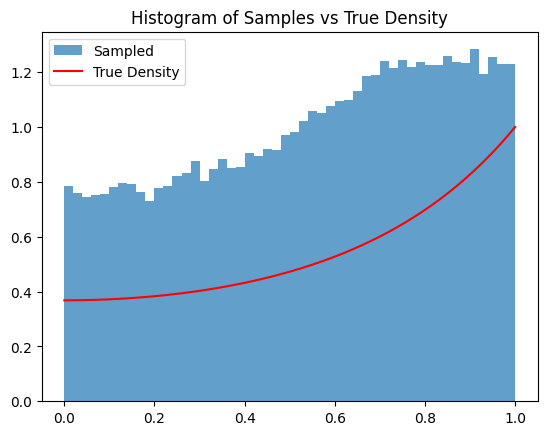

In [2]:


# Task 2: Plot histogram
plt.hist(problem1_samples, bins=50, density=True, alpha=0.7, label="Sampled")
x_vals = np.linspace(0, 1, 1000)
plt.plot(x_vals, np.exp(x_vals**2 - 1), label="True Density", color="red")
plt.legend()
plt.title("Histogram of Samples vs True Density")
plt.show()

In [3]:
# Task 3: Monte Carlo Integration
def monte_carlo_integral(samples):
    integrand = lambda x: np.sin(x) / (2 * x) * np.exp(x**2 - 1)
    evaluations = integrand(samples)
    return evaluations.mean()

problem1_integral = monte_carlo_integral(problem1_samples)


In [4]:

# Task 4: Hoeffding's Confidence Interval
n = len(problem1_samples)
range_ = 1  # Assume max-min range is within [0, 1] for simplicity
epsilon = np.sqrt((range_**2 * np.log(2 / 0.05)) / (2 * n))
problem1_interval = (problem1_integral - epsilon, problem1_integral + epsilon)

print("Integral approximation:", problem1_integral)
print("95% Confidence Interval:", problem1_interval)

Integral approximation: 0.26191073438447005
95% Confidence Interval: (np.float64(0.25761604030100266), np.float64(0.26620542846793743))


In [ ]:




# Task 5: Problem 1 Inversion 2
def problem1_inversion_2(n_samples=1):
    """
    Samples from the second distribution using rejection sampling.
    """
    samples = []
    while len(samples) < n_samples:
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 20 * np.exp(20 - 1))
        if y <= 20 * x * np.exp(20 - 1 / x):
            samples.append(x)
    return np.array(samples)

# Task 6: Problem 2 - Logistic Regression and Calibration
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
spam_data = pd.read_csv("data/spam.csv")
problem2_X = spam_data[["free", "prize", "win"]].values
problem2_Y = spam_data["spam"].values

# Task 7: Split data
problem2_X_train, temp_X, problem2_Y_train, temp_Y = train_test_split(problem2_X, problem2_Y, test_size=0.6)
problem2_X_calib, problem2_X_test, problem2_Y_calib, problem2_Y_test = train_test_split(temp_X, temp_Y, test_size=2/3)

class ProportionalSpam:
    def __init__(self):
        self.coeffs = None

    def loss(self, X, Y, coeffs):
        G = lambda z: 1 / (1 + np.exp(-z))
        logits = coeffs[0] + np.dot(X, coeffs[1:])
        predictions = G(logits)
        return -np.sum(Y * np.log(predictions) + (1 - Y) * np.log(1 - predictions))

    def fit(self, X, Y):
        opt_loss = lambda coeffs: self.loss(X, Y, coeffs)
        initial_coeffs = np.zeros(X.shape[1] + 1)
        result = minimize(opt_loss, initial_coeffs, method='cg')
        self.coeffs = result.x

    def predict(self, X):
        if self.coeffs is not None:
            logits = self.coeffs[0] + np.dot(X, self.coeffs[1:])
            G = lambda z: 1 / (1 + np.exp(-z))
            return G(logits)
        else:
            return None

# Task 8: Train the logistic regression model
problem2_ps = ProportionalSpam()
problem2_ps.fit(problem2_X_train, problem2_Y_train)

# Task 9: Calibration
def calibrate_model(predictions, true_values):
    regressor = DecisionTreeRegressor()
    regressor.fit(predictions.reshape(-1, 1), true_values)
    return regressor

problem2_X_pred = problem2_ps.predict(problem2_X_calib)
problem2_calibrator = calibrate_model(problem2_X_pred, problem2_Y_calib)

# Task 10: Final Predictions and Confidence Interval
problem2_final_predictions = problem2_calibrator.predict(problem2_ps.predict(problem2_X_test).reshape(-1, 1))
problem2_01_loss = np.mean((problem2_final_predictions > 0.5) != problem2_Y_test)
n_test = len(problem2_Y_test)
epsilon_test = np.sqrt((np.log(2 / 0.01)) / (2 * n_test))
problem2_interval = (problem2_01_loss - epsilon_test, problem2_01_loss + epsilon_test)

print("Test Loss:", problem2_01_loss)
print("99% Confidence Interval for Test Loss:", problem2_interval)
